In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import auth
import gspread
from google.auth import default
import re

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('Copy of dataset-ecommerce_Aldrich').sheet1

rows = worksheet.get_all_values()

# Conver to a DataFrame Pandas
df = pd.DataFrame(rows)

# Make the first row as a header
df.columns = df.iloc[0]
df = df.iloc[1:]

In [ ]:
df

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
1,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
2,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
3,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
4,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
5,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51299,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51300,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51301,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51302,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan


**Data Manipulation**

In [ ]:
# converting to data time
df["Order Date"] = pd.to_datetime(df["Order Date"])

# sorting for data in chronological order
df = df.sort_values(by="Order Date")

# Omit $ in the column
df['Sales'] = df['Sales'].str.replace("[^\d.]", "", regex=True)
df["Profit"] = df["Profit"].str.replace('$', '').str.replace(',', '').astype(float)
df['Shipping Cost'] = df['Shipping Cost'].str.replace("[^\d.]", "", regex=True)

<ipython-input-5-7110c2e3ec70>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Profit"] = df["Profit"].str.replace('$', '').str.replace(',', '').astype(float)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51303 entries, 25511 to 51303
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          51303 non-null  object        
 1   Order Date        51303 non-null  datetime64[ns]
 2   Ship Date         51303 non-null  object        
 3   Aging             51303 non-null  object        
 4   Ship Mode         51303 non-null  object        
 5   Product Category  51303 non-null  object        
 6   Product           51303 non-null  object        
 7   Sales             51303 non-null  object        
 8   Quantity          51303 non-null  object        
 9   Discount          51303 non-null  object        
 10  Profit            51303 non-null  float64       
 11  Shipping Cost     51303 non-null  object        
 12  Order Priority    51303 non-null  object        
 13  Customer ID       51303 non-null  object        
 14  Customer Name     

In [ ]:
# Grouping data by order date and calculating the sum of profits
summary_df = df.groupby("Order Date")["Profit"].sum().reset_index()

# Display the summary DataFrame
print(summary_df)

    Order Date   Profit
0   2015-01-01   9721.7
1   2015-01-02   8775.9
2   2015-01-03   8201.4
3   2015-01-04  10067.4
4   2015-01-05   8669.2
..         ...      ...
361 2015-12-28   9475.6
362 2015-12-29  10269.8
363 2015-12-30  10069.9
364 2015-12-31  10972.6
365 2016-01-02    367.9

[366 rows x 2 columns]


***Pie Chart***

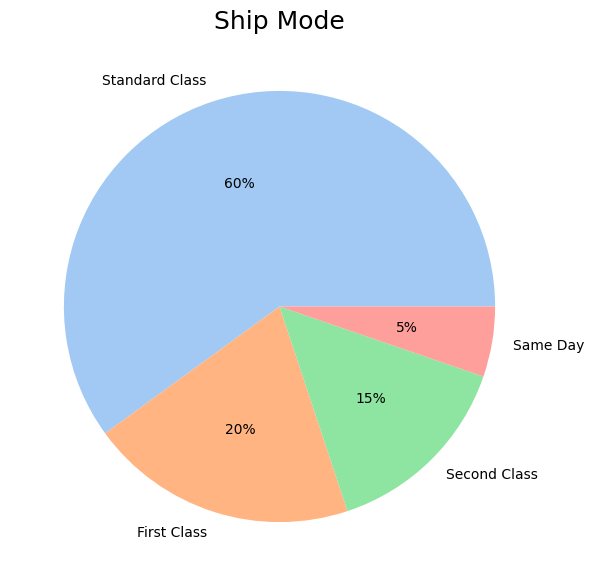

In [ ]:
data = df['Ship Mode'].value_counts()
keys = df['Ship Mode'].unique()

# define Seaborn color palette to use
palette_colors = sns.color_palette("pastel")

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_colors, autopct='%.0f%%')

plt.title(f"Ship Mode", fontsize=18) #title

plt.show()

**Bar Chart**

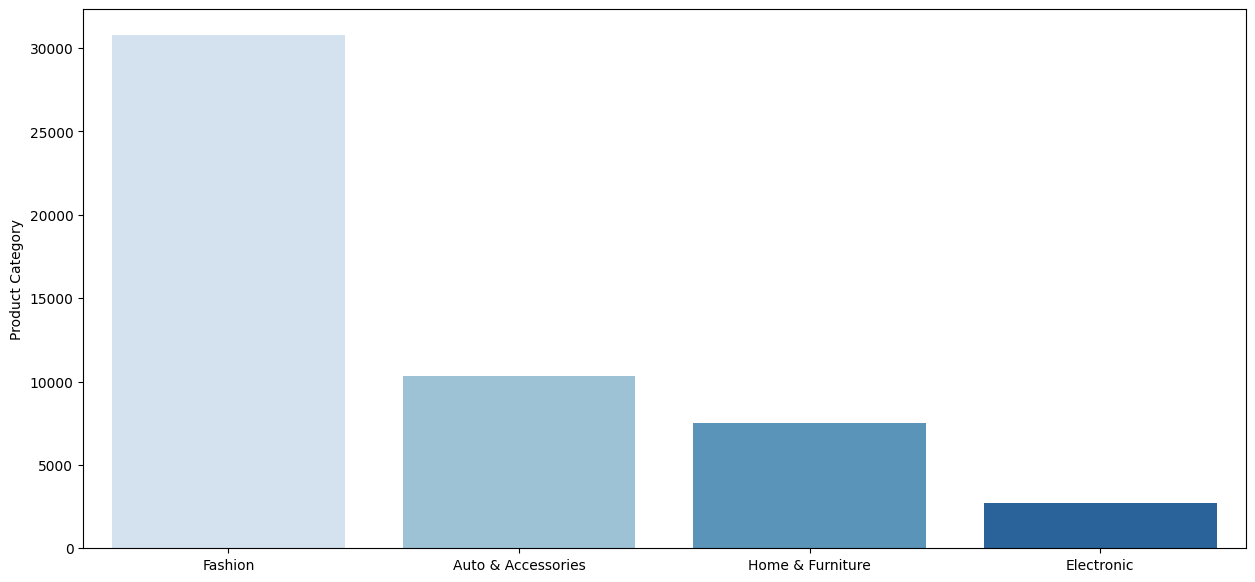

In [ ]:
y = df['Product Category'].value_counts()
x = df['Product Category'].unique()

# Draw bar chart
sns.barplot(x=x, y=y, data = df, palette="Blues")

plt.show()

**1. Consumer segment percentage**

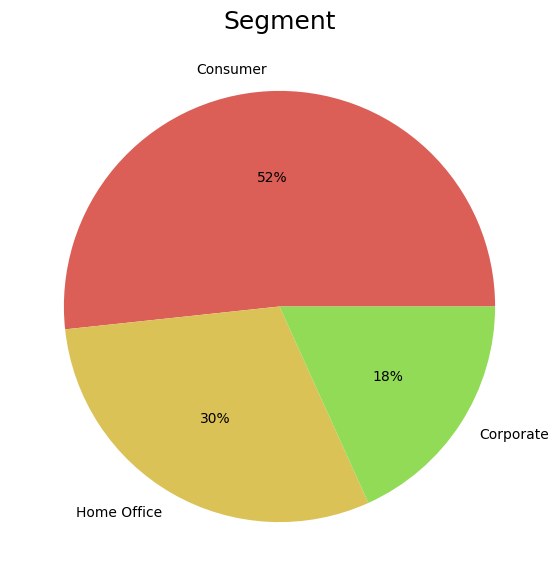

In [ ]:
data1 = df['Segment'].value_counts()
keys1 = df['Segment'].unique()
palette_colors = sns.color_palette("hls", 8)
plt.pie(data1, labels=keys1, colors=palette_colors, autopct='%.0f%%')
plt.title(f"Segment", fontsize=18)
plt.show()

**2. Ship mode percentage**


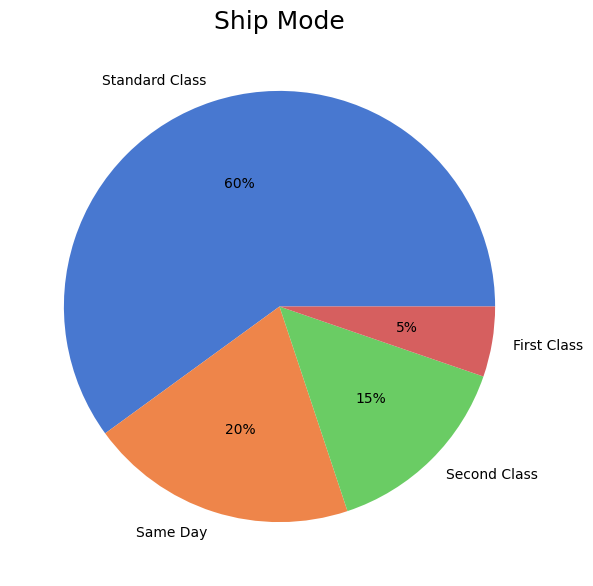

In [ ]:
data1 = df['Ship Mode'].value_counts()
keys1 = df['Ship Mode'].unique()
palette_colors = sns.color_palette("muted")
plt.pie(data1, labels=keys1, colors=palette_colors, autopct='%.0f%%')
plt.title(f"Ship Mode", fontsize=18)

plt.show()

**3. Region percentage**

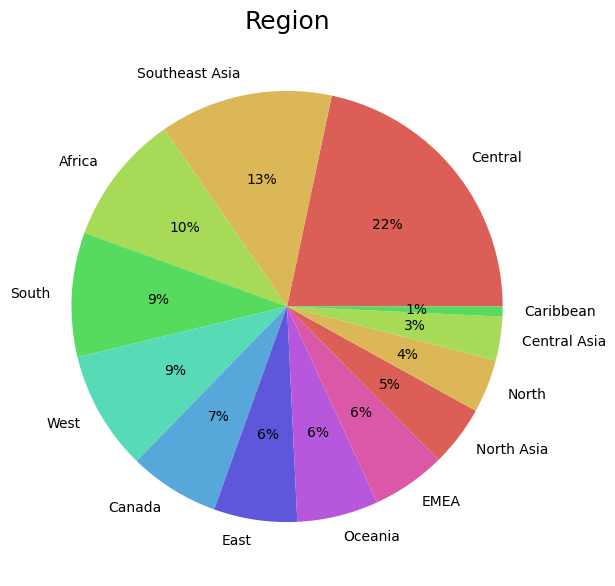

In [ ]:
data1 = df['Region'].value_counts()
keys1 = df['Region'].unique()
palette_colors = sns.color_palette("hls", 9)
plt.pie(data1, labels=keys1, colors=palette_colors, autopct='%.0f%%')
plt.title(f"Region", fontsize=18)
plt.show()

**4. Top and Least Countries for Sales**

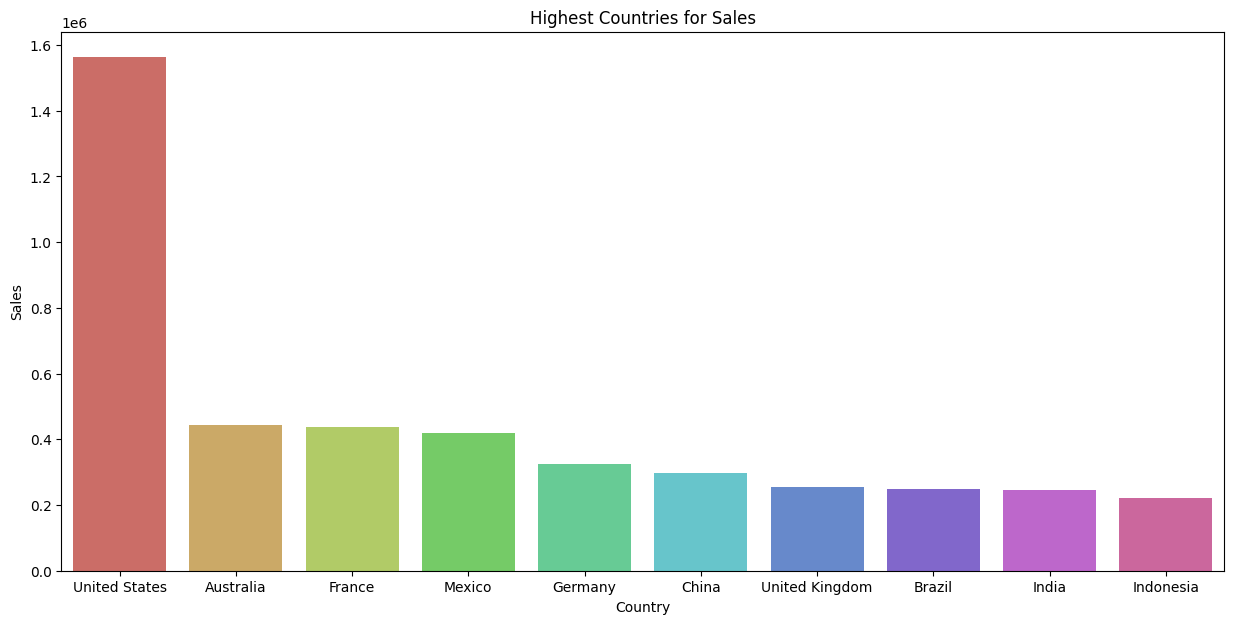

In [ ]:
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
sales_by_country = df.groupby('Country')['Sales'].sum()
top_countries = sales_by_country.nlargest(10)
sns.barplot(x=top_countries.index, y=top_countries, palette="hls")
plt.title("Highest Countries for Sales")
plt.show()

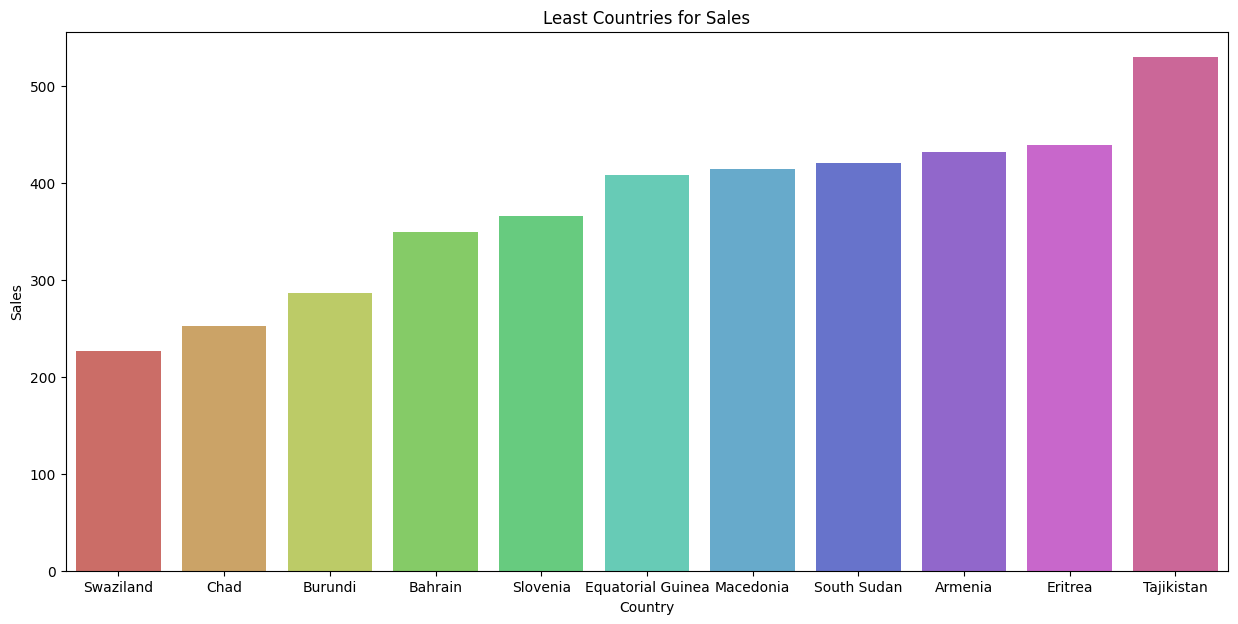

In [ ]:
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
sales_by_country = df.groupby('Country')['Sales'].sum()
top_countries = sales_by_country.nsmallest(11)
sns.barplot(x=top_countries.index, y=top_countries, palette="hls")
plt.title("Least Countries for Sales")
plt.show()

**5. Profit per Date**

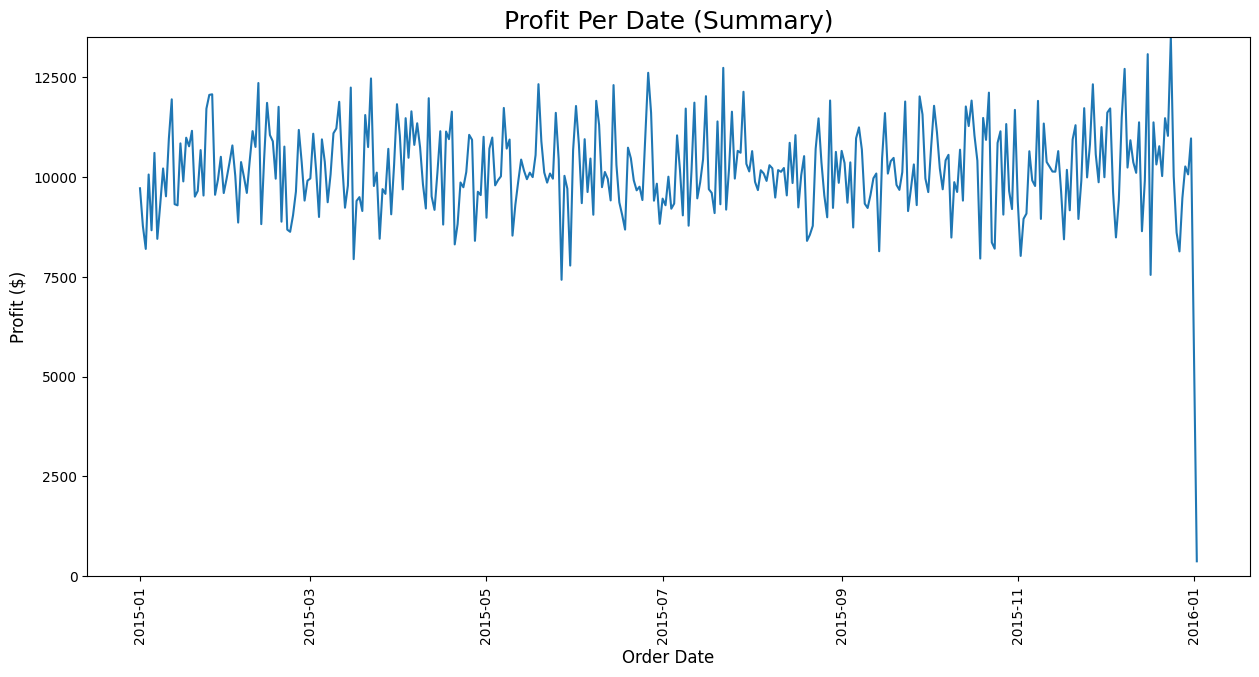

In [ ]:
plt.rcParams['figure.figsize'] = 15, 7
plt.xticks(rotation='vertical')
sns.lineplot(data=summary_df, x="Order Date", y="Profit")
plt.title(f"Profit Per Date (Summary)", fontsize=18)
plt.xlabel("Order Date", fontsize=12)
plt.ylabel("Profit ($)", fontsize=12)
plt.ylim(summary_df["Profit"].min(), summary_df["Profit"].max())
y_ticks = range(0, int(summary_df["Profit"].max())+1, 2500)
plt.yticks(y_ticks)
plt.show()